# Assignment: Telecom Churn

## Problem Statement:
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.<br>
Based on the data set provided, the business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. 

## Solution
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA, IncrementalPCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing data
telecom = pd.read_csv("telecom_churn_data.csv")

In [3]:
pd.set_option("max_columns",None)

In [4]:
# Check the head of data
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [5]:
# Check the mean, std, IQR values for dataset
telecom.describe([0.25,0.50,0.75,0.90,0.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,99%,max
mobile_number,99999.0,7.001207e+09,695669.386290,7.000000e+09,7.000606e+09,7.001205e+09,7.001812e+09,7.002174e+09,7.002387e+09,7.002411e+09
circle_id,99999.0,1.090000e+02,0.000000,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02,1.090000e+02
loc_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
std_og_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
loc_ic_t2o_mou,98981.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
aon,99999.0,1.219855e+03,954.733842,1.800000e+02,4.670000e+02,8.630000e+02,1.807500e+03,2.799200e+03,3.651000e+03,4.337000e+03
aug_vbc_3g,99999.0,6.817025e+01,267.580450,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.603720e+02,1.240064e+03,1.291622e+04
jul_vbc_3g,99999.0,6.683906e+01,271.201856,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.393020e+02,1.278158e+03,9.165600e+03
jun_vbc_3g,99999.0,6.002120e+01,253.938223,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.126460e+02,1.187785e+03,1.116621e+04


It seems to be a big data set having lots of columns so lets start with Data cleaning activites to check if there is any missing data in columns that can be dropped

# Step 1: Data Cleaning

In [6]:
# Replace NaN with 0.0 in data recharge columns for all the months
telecom['total_rech_data_6'] = telecom['total_rech_data_6'].fillna(0.0)
telecom['total_rech_data_7'] = telecom['total_rech_data_6'].fillna(0.0)
telecom['total_rech_data_8'] = telecom['total_rech_data_6'].fillna(0.0)
telecom['total_rech_data_9'] = telecom['total_rech_data_6'].fillna(0.0)
telecom['av_rech_amt_data_6'] = telecom['av_rech_amt_data_6'].fillna(0.0)
telecom['av_rech_amt_data_7'] = telecom['av_rech_amt_data_6'].fillna(0.0)
telecom['av_rech_amt_data_8'] = telecom['av_rech_amt_data_6'].fillna(0.0)
telecom['av_rech_amt_data_9'] = telecom['av_rech_amt_data_6'].fillna(0.0)

In [7]:
# Check the head of data
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [8]:
# Identify missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(50)

count_rech_3g_6             74.85
fb_user_6                   74.85
date_of_last_rech_data_6    74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
max_rech_data_6             74.85
count_rech_2g_6             74.85
arpu_3g_6                   74.85
fb_user_7                   74.43
arpu_3g_7                   74.43
date_of_last_rech_data_7    74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
count_rech_2g_7             74.43
night_pck_user_7            74.43
max_rech_data_7             74.43
arpu_3g_9                   74.08
fb_user_9                   74.08
max_rech_data_9             74.08
date_of_last_rech_data_9    74.08
count_rech_3g_9             74.08
night_pck_user_9            74.08
arpu_2g_9                   74.08
count_rech_2g_9             74.08
count_rech_2g_8             73.66
arpu_3g_8                   73.66
max_rech_data_8             73.66
arpu_2g_8                   73.66
count_rech_3g_8             73.66
night_pck_user

##### There are columns having more than 70% of data missing. As this is a huge missing data and will not contribute much to the overall data so I choose to drop those columns.

In [9]:
# Dropping all the columns by setting up the threshold
thresh = len(telecom) * .3
telecom = telecom.dropna(thresh = thresh, axis = 1, inplace = False)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,1.0,1.0,1.0,1.0,252.0,252.0,252.0,252.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,

In [10]:
telecom.shape

(99999, 194)

In [11]:
# Dropping circle_id and mobile_number variables as it is of no use in data analysis
telecom = telecom.drop(['mobile_number','circle_id'], axis=1)

In [12]:
# Identify missing values
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(60)

loc_ic_t2f_mou_9       7.75
std_ic_t2t_mou_9       7.75
loc_og_t2t_mou_9       7.75
loc_og_t2m_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_og_t2f_mou_9       7.75
loc_og_t2c_mou_9       7.75
std_og_t2c_mou_9       7.75
loc_ic_mou_9           7.75
loc_og_mou_9           7.75
std_og_t2t_mou_9       7.75
roam_og_mou_9          7.75
std_ic_t2m_mou_9       7.75
std_og_t2m_mou_9       7.75
ic_others_9            7.75
std_ic_t2f_mou_9       7.75
isd_ic_mou_9           7.75
std_ic_t2o_mou_9       7.75
spl_ic_mou_9           7.75
std_ic_mou_9           7.75
loc_ic_t2t_mou_9       7.75
std_og_t2f_mou_9       7.75
og_others_9            7.75
offnet_mou_9           7.75
isd_og_mou_9           7.75
std_og_mou_9           7.75
roam_ic_mou_9          7.75
spl_og_mou_9           7.75
onnet_mou_9            7.75
onnet_mou_8            5.38
std_og_t2t_mou_8       5.38
og_others_8            5.38
std_ic_t2m_mou_8       5.38
std_og_t2m_mou_8       5.38
std_og_t2f_mou_8       5.38
std_ic_t2f_mou_8    

In [13]:
# Calculate the number of rows having more that 20 missing values
100*(len(telecom[telecom.isnull().sum(axis=1)>20].index)/len(telecom.index))

11.67211672116721

There are around 11% of rows having more than 20 missing values so taking a call to remove those rows.

In [14]:
telecom = telecom[telecom.isnull().sum(axis=1)<=20]

In [15]:
telecom.shape

(88327, 192)

The date fields are not having meaningful information that can help in churn analysis so taking the call to delete all the date fields

In [16]:
# Aggregating all the date fields in new column
date_col_list = []

for col in telecom.columns:
    if 'date' in col:
        date_col_list.append(col)
        
date_col_list        

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [17]:
# Dropping all the date fields
telecom = telecom.drop(date_col_list, axis=1)

In [18]:
telecom.shape

(88327, 184)

In [19]:
# Identify missing values after removing some missing rows from few columns
round(100*(telecom.isnull().sum()/len(telecom.index)),2).sort_values(ascending=False).head(10)

sep_vbc_3g          0.0
std_og_t2c_mou_8    0.0
isd_og_mou_9        0.0
isd_og_mou_8        0.0
isd_og_mou_7        0.0
isd_og_mou_6        0.0
std_og_mou_9        0.0
std_og_mou_8        0.0
std_og_mou_7        0.0
std_og_mou_6        0.0
dtype: float64

#### Now, all the missing values are removed from the dateset and we can proceed with next step

# Step 2: Filter High- Value Customers (HVC)

In [20]:
telecom.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
1,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.23,4.58,0.13,0.00,0.0,0.0,0.0,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,29.23,116.09,17.48,65.38,375.58,56.93,0.00,8.93,3.61,0.00,19.09,104.23,408.43,173.03,0.00,0.00,2.35,0.00,5.90,0.00,12.49,15.01,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,5.90,0.00,14.84,15.01,26.83,104.23,423.28,188.04,0.00,0.00,0.00,0.00,1.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,9,11,5,74,384,283,121,44,154,65,50,44,23,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,108.07,365.47,0.0,0.0,0.00,0.00,0.00,0,1,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1006,0.00,0.00,0.00,0.0
2,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,208.36,118.91,0.00,0.00,0.00,38.49,0.00,0.00,0.00,70.94,7.19,28.74,13.58,14.39,29.34,16.86,38.46,28.16,24.11,21.79,15.61,22.24,0.00,135.54,45.76,0.48,60.66,67.41,67.66,64.81,4.34,26.49,22.58,8.76,41.81,67.41,75.53,9.28,1.48,14.76,22.83,0.00,0.0,0.0,0.0,0.0,47.64,108.68,120.94,18.04,0.0,0.0,0.0,0.0,46.56,236.84,96.84,42.08,0.45,0

##### Calculating Aggregate Recharge amount

Aggregate Recharge amount  = Total data recharge + Total calling recharge

Where
- Total data recharge = number of recharge * avg recharge amount


In [21]:
# Calculating Total Recharge amount for month-6
telecom['Agg_rech_amt_6'] = telecom.total_rech_amt_6 + (telecom.total_rech_data_6 * telecom.av_rech_amt_data_6)

In [22]:
# Calculating Total Recharge amount for month-7
telecom['Agg_rech_amt_7'] = telecom.total_rech_amt_7 + (telecom.total_rech_data_7 * telecom.av_rech_amt_data_7)

In [23]:
# Calculating Avg Recharge amount for month 6 and 7
telecom['Avg_rech_amt_6_7'] = (telecom['Agg_rech_amt_6'] + telecom['Agg_rech_amt_7'])/2

In [24]:
# Finding 70 percentile of Avg Recharge amount for month 6 and 7
telecom.Avg_rech_amt_6_7.quantile(0.7)

476.5

In [25]:
# To find high-value customers: Filter all the columns where Avg Recharge amount > 476.5
telecom_hvc = telecom[telecom.Avg_rech_amt_6_7 > 476.5]

In [26]:
telecom_hvc.shape

(26478, 187)

# Step 3: Tag Churners and Remove attributes of the churn phase

- #1 Calculate total incoming and outgoing minutes usgae for month-9
- #2 Calculate 2G and 3G data comsumption

Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
(If, #1 = 0 AND #2 = 0, then churn = 1, else 0)

- #3 After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [27]:
telecom_hvc.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Agg_rech_amt_6,Agg_rech_amt_7,Avg_rech_amt_6_7
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.0,0.0,0.0,7.15,0.0,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,0.0,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.0,437.0,601.0,519.0
21,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.0,0.0,0.0,0.00,0.0,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,763.

#1 Calculate total incoming and outgoing minutes usgae for month-9

In [28]:
# Find all the incoming minutes usage column for month -9 to find the total usuage column
ic_9_list = []
for col in telecom_hvc.columns:
    if 'ic' in col:
        if '_9' in col:
            ic_9_list.append(col)
        
ic_9_list        

['roam_ic_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_t2o_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9']

In [29]:
# Find all the outgoing minutes usage column for month -9 to find the total usuage column
og_9_list = []
for col in telecom_hvc.columns:
    if 'og' in col:
        if '_9' in col:
            og_9_list.append(col)
        
og_9_list        

['roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_t2c_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9']

In [30]:
# Find all the 2G and 3G column for month -9
colm_2g_3g_list = []
for col in telecom_hvc.columns:
    if '2g' in col:
        if '_9' in col:
            colm_2g_3g_list.append(col)
    if '3g' in col:
        if '_9' in col:
            colm_2g_3g_list.append(col)
        
colm_2g_3g_list        

['vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9']

In [31]:
telecom_hvc['churn'] = np.where(((telecom_hvc['total_ic_mou_9'] == 0) & (telecom_hvc['total_og_mou_9'] == 0) & (telecom_hvc['vol_2g_mb_9'] == 0) & (telecom_hvc['vol_3g_mb_9'] == 0)),1,0)

In [32]:
telecom_hvc[telecom_hvc.churn ==0]

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Agg_rech_amt_6,Agg_rech_amt_7,Avg_rech_amt_6_7,churn
8,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,35.08,33.46,94.66,80.63,136.48,108.71,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,297.13,217.59,12.49,26.13,80.96,70.58,50.54,34.58,0.00,0.00,0.00,0.00,0.00,0.00,7.15,0.00,378.09,288.18,63.04,60.71,116.56,133.43,22.58,7.33,13.69,10.04,75.69,74.13,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,130.26,143.48,98.28,81.46,0.00,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,0.0,0.0,508.36,431.66,171.56,142.18,23.84,9.84,0.31,4.03,57.58,13.98,15.48,17.34,0.00,0.00,0.00,0.00,81.43,23.83,15.79,21.38,0.00,0.58,0.10,0.00,22.43,4.08,0.65,13.53,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,22.43,4.66,0.75,13.53,103.86,28.49,16.54,34.91,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,15,437,601,120,186,90,154,30,36,50,0,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,0.00,750.95,11.94,0.00,0,1,0,0,0,1,3,0,0,0,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,437.0,601.0,519.0,0
21,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,85.14,161.63,757.93,896.68,983.39,869.89,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,4.48,6.16,23.34,29.98,91.81,87.93,104.81,107.54,0.75,0.00,1.58,0.00,0.00,0.00,0.00,0.00,97.04,94.09,129.74,137.53,97.93,125.94,61.79,131.64,665.36,808.74,876.99,762.34,0.00,0.00,0.00,0.00

In [33]:
# Remove all attributes having _9 in their names
col_list_9 = []

for col in telecom_hvc.columns:
    if '_9' in col:
        col_list_9.append(col)
            
telecom_hvc = telecom_hvc.drop(col_list_9, axis=1)

In [34]:
telecom_hvc.shape

(26478, 144)

In [35]:
telecom_hvc.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Agg_rech_amt_6,Agg_rech_amt_7,Avg_rech_amt_6_7,churn
8,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.0,0.0,0.0,0.0,0.0,0.0,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.00,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.00,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.00,356.00,0.03,0.00,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,437.0,601.0,519.0,0
21,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,0.0,0.0,0.0,0.0,0.0,0.0,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.00,0.0,0.00,97.04,94.09,129.74,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,0.0,0.0,0.0,763.29,934.69,938.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,860.34,1028.79,1068.54,2.48,10.19,19.54,118.23,74.63,129.16,4.61,2.84,10.39,125.33,87.68,159.11,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,0.0,0.0,0.0,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,600.0,680.0,640.0,0
33,0.0,0.0,0.0,977.020,2362.833,409.230,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.56,0.00,0.0,0.0,0.00,0.00,0.56,1.75,0.56,2.45,0.00,0.00,37.93,1.73,0.31,0.16,3.48,0.88,40.54,0.00,2.91,0.05,2.95,1.78,0.86,0.23,0.96,0.13,0.0,0.0,0.0,3.18,5.66,1.04,7.89,7.19,41.79,0.00,0.0,0.0,0.00

# Step 4: Derive new features

To check if we need to take any action for customer, we need to check if there is any uncommon activity between month 8 vs previous months ( 6 and 7). To calcuate that, we will be taking the different between few varaibles.

In [36]:
# Calculating diff for Average revenue per user  (arpu variable) between 8 vs 6&7
telecom_hvc['arpu_diff'] = (telecom_hvc.arpu_6 + telecom_hvc.arpu_7)/2 - telecom_hvc.arpu_8

In [37]:
# Calculating diff for Total incoming minutes of usuage  (total_ic_mou variable) between 8 vs 6&7
telecom_hvc['ic_mou_diff'] = (telecom_hvc.total_ic_mou_6 + telecom_hvc.total_ic_mou_7)/2 - telecom_hvc.total_ic_mou_8


In [38]:
# Calculating diff for Total outgoing minutes of usuage  (total_og_mou variable) between 8 vs 6&7
telecom_hvc['og_mou_diff'] = (telecom_hvc.total_og_mou_6 + telecom_hvc.total_og_mou_7)/2 - telecom_hvc.total_og_mou_8


In [39]:
# Calculating diff for Local outgoing minutes of usuage  (total_og_mou variable) between 8 vs 6&7
telecom_hvc['loc_og_t2t_mou_diff'] = (telecom_hvc.loc_og_t2t_mou_6 + telecom_hvc.loc_og_t2t_mou_7)/2 - telecom_hvc.loc_og_t2t_mou_8


In [40]:
# Calculating diff for STD outgoing minutes of usuage  (total_og_mou variable) between 8 vs 6&7
telecom_hvc['std_og_t2f_mou_diff'] = (telecom_hvc.std_og_t2f_mou_6 + telecom_hvc.std_og_t2f_mou_7)/2 - telecom_hvc.std_og_t2f_mou_8


# Step 4: Plotting some graph for the EDA purpose

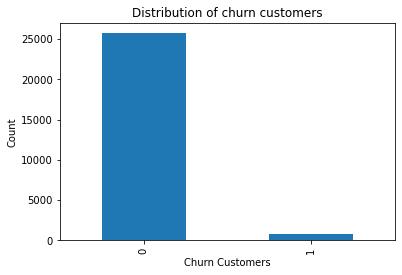

In [41]:
# Distribution of churn customers
telecom_hvc['churn'].value_counts().plot.bar()

# Add title and axis name
plt.title('Distribution of churn customers')
plt.xlabel('Churn Customers')
plt.ylabel('Count')

plt.show()

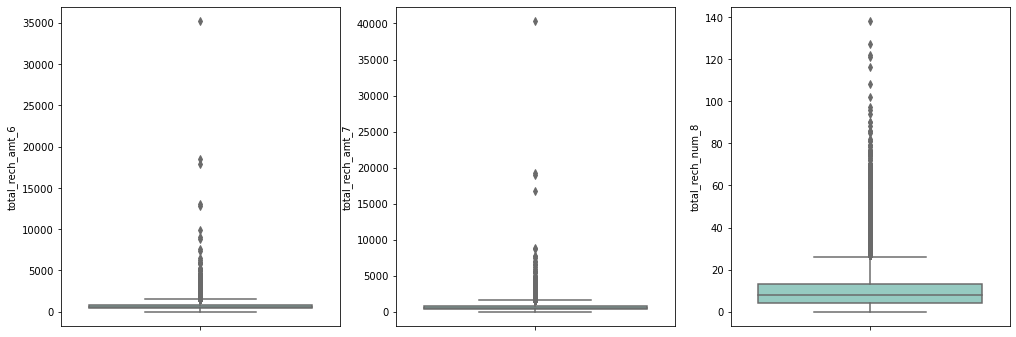

In [42]:
# Check the outliers in the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'total_rech_amt_6', palette='Set3', data = telecom_hvc)
plt.subplot(3,3,2)
sns.boxplot(y = 'total_rech_amt_7', palette='Set3', data = telecom_hvc)
plt.subplot(3,3,3)
sns.boxplot(y = 'total_rech_num_8', palette='Set3', data = telecom_hvc)
plt.show()

By looking at the data, it seems to be a geuniun data as all the columns values are high so there is patten of high usuage

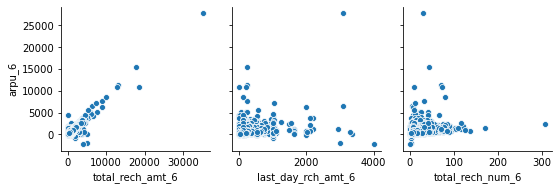

In [43]:
sns.pairplot(
    telecom_hvc,
    x_vars=["total_rech_amt_6", "last_day_rch_amt_6","total_rech_num_6"],
    y_vars=["arpu_6"],
)
plt.show()

This analysis for month 6
- There seems to be a positive relation between total recharge and Average revenue per user
- There seems most of the revenue comes from users who recharge in less that 1000 days but there are some outliers who recharge after 3000 days

#### Outlier Treatment

#### Below function is used for hadling the outliers where i am taking the lower and upper quantile as 0.25 & 0.99 respectively¶

In [44]:
num_col = list(telecom_hvc.dtypes[telecom_hvc.dtypes !='object'].index)

def drop_outliers(x):
    list = []
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

telecom_final = drop_outliers(telecom_hvc)

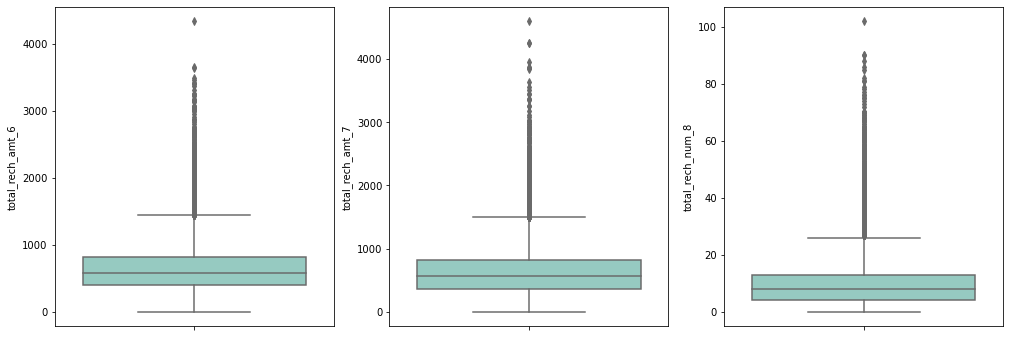

In [45]:
# Check the outliers again in the numeric columns

plt.figure(figsize=(17, 20))
plt.subplot(3,3,1)
sns.boxplot(y = 'total_rech_amt_6', palette='Set3', data = telecom_final)
plt.subplot(3,3,2)
sns.boxplot(y = 'total_rech_amt_7', palette='Set3', data = telecom_final)
plt.subplot(3,3,3)
sns.boxplot(y = 'total_rech_num_8', palette='Set3', data = telecom_final)
plt.show()

#### Train-test Split

In [46]:
# Setting stratify to churn variable to have the same proportions of class labels as the input dataset
df_train,df_test = train_test_split(telecom_final,train_size=0.7,test_size=0.3,random_state=42, stratify=telecom_final.churn)

# Step 5: Building High Performance Model Using PCA

### Scaling the Train Set

In [47]:
num_column = list(telecom_final.dtypes[telecom_final.dtypes !='object'].index)

In [48]:
num_column.remove('churn')

In [49]:
scaler = StandardScaler()
df_train[num_column] = scaler.fit_transform(df_train[num_column])
df_test[num_column] = scaler.fit_transform(df_test[num_column])

In [50]:
df_train.head(10)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Agg_rech_amt_6,Agg_rech_amt_7,Avg_rech_amt_6_7,churn,arpu_diff,ic_mou_diff,og_mou_diff,loc_og_t2t_mou_diff,std_og_t2f_mou_diff
76801,0.0,0.0,0.0,-0.500383,1.116305,3.488141,-0.628337,-0.562940,-0.507960,-0.711285,-0.504910,-0.397137,-0.075380,0.610995,0.426944,0.080726,0.888449,0.559319,-0.495667,-0.449904,-0.326321,-0.595376,-0.567860,-0.416479,-0.380702,0.341623,-0.381701,-0.311029,-0.315491,-0.307715,-0.697342,-0.621768,-0.475197,-0.447951,-0.444254,-0.404997,-0.464088,-0.366101,-0.293571,-0.181680,-0.204779,-0.210743,0.0,0.0,0.0,-0.614360,-0.546102,-0.464486,0.018817,-0.119115,0.168315,-0.443423,-0.482391,-0.479247,-0.351618,0.0,0.0,-0.935214,-0.820936,-0.661880,-0.580018,-0.569972,-0.378709,-0.522418,-0.388757,-0.476362,-0.392501,-0.366733,-0.302391,-0.676104,-0.567242,-0.543101,-0.309785,-0.323826,-0.332941,-0.422288,-0.191080,-0.255926,-0.249910,-0.257436,-0.259139,0.0,0.0,0.0,-0.491178,-0.308929,-0.365726,-0.774720,-0.628392,-0.615772,-0.430470,-0.203995,-0.260164,-0.215257,-0.241104,-0.234220,-0.230851,-0.232714,-0.238359,-0.351053,-0.070074,0.441016,-0.419134,1.151955,4.439752,0.647643,0.628266,0.734412,0.122040,-0.820502,1.420513,0.109210,0.109210,0.109210,2.201571,2.201571,2.201571,-0.271094,-0.299711,0.048997,2.298754,2.326077,6.003448,-0.423893,-0.402363,-0.388421,-0.449276,-0.425151,-0.431289,3.200421,3.072820,8.423859,-0.266053,-0.231782,-0.225685,0.348256,1.175866,3.137847,2.996111,-0.192622,0.446124,1.152752,0.810648,0,-4.268104,-0.185405,-0.348667,-0.381280,-0.040831
27209,0.0,0.0,0.0,0.540536,-4.300105,0.103532,-0.444358,-0.531898,-0.475607,0.823475,1.195393,0.987040,-0.248525,-0.217007,-0.228111,-0.265515,-0.244799,-0.254276,-0.075885,-0.255296,-0.193400,1.972712,2.992356,2.324454,1.177072,0.648798,2.533364,-0.308844,-0.315491,-0.307715,1.483578,2.095920,1.757275,-0.419263,-0.448203,-0.416019,-0.401519,-0.411809,-0.334173,0.594778,-0.204779,-0.181831,0.0,0.0,0.0,-0.546455,-0.579746,-0.498099,-0.1

In [51]:
# Spliting the dependent and independent variable

y_train = df_train.pop('churn')
X_train = df_train

In [52]:
# Create instance of PCA
pca = PCA(random_state=42)

In [53]:
pca.fit(X_train)

PCA(random_state=42)

In [54]:
pca.explained_variance_ratio_

array([1.21959925e-01, 9.71914340e-02, 6.29076686e-02, 4.96756320e-02,
       4.06597832e-02, 3.45062239e-02, 3.36562983e-02, 2.60548504e-02,
       2.41093795e-02, 2.15630112e-02, 2.08426162e-02, 1.94103059e-02,
       1.86911786e-02, 1.79896654e-02, 1.62748319e-02, 1.50110219e-02,
       1.37419977e-02, 1.33702862e-02, 1.23757654e-02, 1.19038308e-02,
       1.14611329e-02, 1.10745399e-02, 1.07370205e-02, 1.06691736e-02,
       1.00690691e-02, 9.38948860e-03, 8.68051612e-03, 8.59583563e-03,
       8.35686429e-03, 8.03411045e-03, 7.93523405e-03, 7.82978839e-03,
       7.34968752e-03, 6.96539007e-03, 6.92340474e-03, 6.71656523e-03,
       6.59620592e-03, 6.42674268e-03, 6.41646867e-03, 5.88105591e-03,
       5.55810114e-03, 5.52572672e-03, 5.39942269e-03, 5.33860496e-03,
       5.25534313e-03, 5.15470492e-03, 4.99173464e-03, 4.82072445e-03,
       4.48096869e-03, 4.33468662e-03, 4.30001329e-03, 4.21721967e-03,
       4.05727288e-03, 3.90947320e-03, 3.88739037e-03, 3.72644709e-03,
      

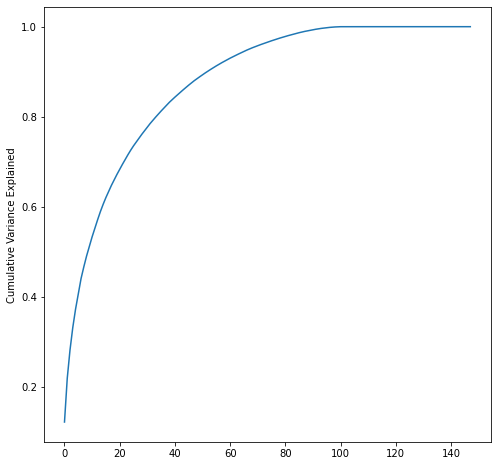

In [55]:
# Scree plot for explained variance 
var_cumu = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=[8,8])
plt.plot(var_cumu)
plt.ylabel('Cumulative Variance Explained')
plt.show()

We can see around 95% variance can be explained by 50 components so taking a call to peform PCA with 50 components

In [56]:
pca_final = IncrementalPCA(n_components=50)

In [57]:
X_train_pca = pca_final.fit_transform(X_train)

In [58]:
X_train_pca.shape

(16333, 50)

In [59]:
# Create correlation matrix
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape

(50, 50)

Plotting the heatmam for correlation matrix

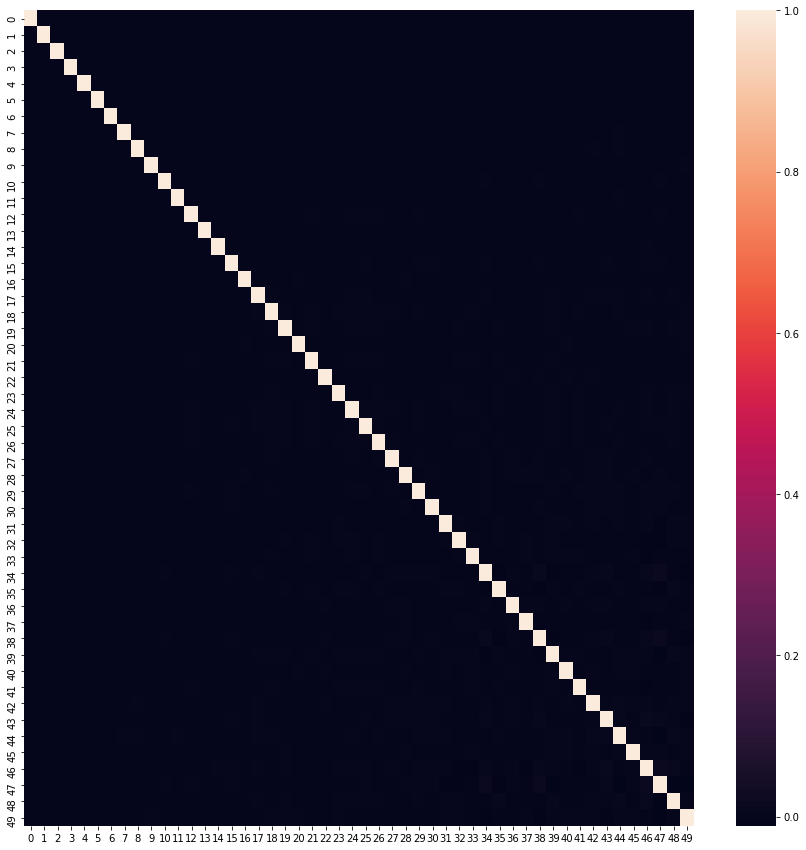

In [60]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat)
plt.show()

This shows that new columns are not correlated with each other

### [FIRST MODEL] Applying Logistic Regression on data on the Principle Components

In [61]:
# Create model instance
lr_pca = LogisticRegression()

# Fit the model
model_pca = lr_pca.fit(X_train_pca, y_train)

Making prediction on test data

In [62]:
# Divide into X_test and y_test
y_test = df_test.pop('churn')
X_test = df_test

In [63]:
X_test_pca = pca_final.fit_transform(X_test)

In [64]:
# Make Prediction
y_pred = model_pca.predict(X_test_pca)

#### Calculate the R-squared score on the test set

In [65]:
r2_score(y_true = y_test, y_pred = y_pred)

-0.44079177155842686

### [SECOND MODEL] Applying Random Forest on data on the Principle Components

In [66]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()

# fit
rfc.fit(X_train_pca,y_train)

RandomForestClassifier()

In [67]:
# Making predictions
predictions = rfc.predict(X_test_pca)

In [68]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6798
           1       0.00      0.00      0.00       203

    accuracy                           0.97      7001
   macro avg       0.49      0.50      0.49      7001
weighted avg       0.94      0.97      0.96      7001



In [69]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6798    0]
 [ 203    0]]


In [70]:
print(accuracy_score(y_test,predictions))

0.9710041422653907


### Hyperparameter Tuning

#### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [71]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [72]:
# Fit the grid search to the data
grid_search.fit(X_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  4.6min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [73]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9709789993538575 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [74]:
# model with the best hyperparameters
rfc_hp = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [75]:
# fit
rfc_hp.fit(X_train_pca,y_train)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

In [76]:
# predict
predictions_hp = rfc_hp.predict(X_test_pca)

### Model Evaluation

In [77]:
print(classification_report(y_test,predictions_hp))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6798
           1       0.00      0.00      0.00       203

    accuracy                           0.97      7001
   macro avg       0.49      0.50      0.49      7001
weighted avg       0.94      0.97      0.96      7001



In [78]:
print(confusion_matrix(y_test,predictions_hp))

[[6798    0]
 [ 203    0]]


In [79]:
print(accuracy_score(y_test,predictions_hp))

0.9710041422653907


### [THIRD MODEL] Applying Decision Tree on data on the Principle Components

In [80]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5)

In [81]:
# Let's check the evaluation metrics of our default model

# Making predictions
y_pred_default = dt_default.predict(X_test_pca)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      6798
           1       0.07      0.01      0.02       203

    accuracy                           0.97      7001
   macro avg       0.52      0.50      0.50      7001
weighted avg       0.94      0.97      0.96      7001



In [82]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6770   28]
 [ 201    2]]
0.9672903870875589


### Hyperparameter Tuning

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [83]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   27.0s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [84]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9710402284081514
DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=50)


In [85]:
# Running model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [86]:
# accuracy score
clf_gini.score(X_test_pca,y_test)

0.9710041422653907

# Step 6: Building Interpretability Model Without PCA (RFE and VIF/p-value)

This time we will be using LinearRegresssion funtion from SciKit Learn library with RFE

#### RFE

Recursive feature elimination

In [87]:
# Running RFE with output number of variable equal to 15

# Create model instance
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Pass the fitted model and number of variables want to choose i.e 15 
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

In [88]:
# Check the RFE selected feature along with their ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('loc_og_t2o_mou', False, 133),
 ('std_og_t2o_mou', False, 129),
 ('loc_ic_t2o_mou', False, 125),
 ('arpu_6', False, 114),
 ('arpu_7', False, 87),
 ('arpu_8', False, 98),
 ('onnet_mou_6', False, 60),
 ('onnet_mou_7', False, 45),
 ('onnet_mou_8', False, 53),
 ('offnet_mou_6', False, 59),
 ('offnet_mou_7', False, 54),
 ('offnet_mou_8', False, 100),
 ('roam_ic_mou_6', False, 84),
 ('roam_ic_mou_7', False, 83),
 ('roam_ic_mou_8', False, 75),
 ('roam_og_mou_6', False, 61),
 ('roam_og_mou_7', False, 62),
 ('roam_og_mou_8', False, 112),
 ('loc_og_t2t_mou_6', True, 1),
 ('loc_og_t2t_mou_7', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 2),
 ('loc_og_t2m_mou_7', False, 38),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_6', False, 4),
 ('loc_og_t2f_mou_7', False, 39),
 ('loc_og_t2f_mou_8', True, 1),
 ('loc_og_t2c_mou_6', False, 93),
 ('loc_og_t2c_mou_7', False, 128),
 ('loc_og_t2c_mou_8', False, 103),
 ('loc_og_mou_6', False, 3),
 ('loc_og_mou_7', False, 37),
 ('loc

In [89]:
# Take out all the columns where RFE support is True

col = X_train.columns[rfe.support_]
col

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_7', 'loc_ic_mou_8', 'loc_og_t2t_mou_diff'],
      dtype='object')

In [90]:
# Remove the columns that RFE doesn't support

X_train.columns[~rfe.support_]

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g', 'Agg_rech_amt_6',
       'Agg_rech_amt_7', 'Avg_rech_amt_6_7', 'arpu_diff', 'ic_mou_diff',
       'og_mou_diff', 'std_og_t2f_mou_diff'],
      dtype='object', length=133)

### [FIRST MODEL] Applying Logistic Regression


In [91]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [92]:
# Adding constant variables
X_train_rfe = sm.add_constant(X_train_rfe)

In [93]:
# Running the model

lr_sm = sm.OLS(y_train, X_train_rfe).fit()

In [94]:
# Check the summary of the linear model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     55.33
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.69e-152
Time:                        10:01:36   Log-Likelihood:                 6351.0
No. Observations:               16333   AIC:                        -1.267e+04
Df Residuals:                   16318   BIC:                        -1.256e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

All the variable have p-value 0 so we can proceed with VIF

In [95]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
1,loc_og_t2t_mou_6,inf
2,loc_og_t2t_mou_7,inf
3,loc_og_t2t_mou_8,inf
15,loc_og_t2t_mou_diff,inf
6,loc_og_mou_8,2.562429e+09
13,loc_ic_mou_7,1.743778e+09
14,loc_ic_mou_8,1.724507e+09
4,loc_og_t2m_mou_8,1.415162e+09
9,loc_ic_t2m_mou_7,9.889438e+08
10,loc_ic_t2m_mou_8,9.695159e+08


We generally want a VIF that is less than 5 so `loc_og_t2t_mou_6` variable should be dropped as it has VIF inf i.e perfect correlation

In [96]:
# Dropping loc_og_t2t_mou_6 variable and updating the model
X_train_rfe_1 = X_train_rfe.drop('loc_og_t2t_mou_6', 1,)

In [97]:
# Run the model again

lr_sm = sm.OLS(y_train, X_train_rfe_1).fit()

In [98]:
# Print the summary of the model

print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     55.33
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.69e-152
Time:                        10:01:36   Log-Likelihood:                 6351.0
No. Observations:               16333   AIC:                        -1.267e+04
Df Residuals:                   16318   BIC:                        -1.256e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [99]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_1
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
5,loc_og_mou_8,2.562429e+09
12,loc_ic_mou_7,1.743778e+09
13,loc_ic_mou_8,1.724507e+09
3,loc_og_t2m_mou_8,1.415162e+09
8,loc_ic_t2m_mou_7,9.889438e+08
9,loc_ic_t2m_mou_8,9.695159e+08
2,loc_og_t2t_mou_8,5.270120e+08
6,loc_ic_t2t_mou_7,2.694417e+08
7,loc_ic_t2t_mou_8,2.610737e+08
10,loc_ic_t2f_mou_7,3.297716e+07


In [100]:
# Dropping loc_og_t2t_mou_7 variable and updating the model
X_train_rfe_2 = X_train_rfe_1.drop('loc_og_t2t_mou_7', 1,)

In [101]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_2).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     59.42
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          5.97e-153
Time:                        10:01:36   Log-Likelihood:                 6349.9
No. Observations:               16333   AIC:                        -1.267e+04
Df Residuals:                   16319   BIC:                        -1.256e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [102]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_2
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
4,loc_og_mou_8,2.562422e+09
11,loc_ic_mou_7,1.743731e+09
12,loc_ic_mou_8,1.724483e+09
2,loc_og_t2m_mou_8,1.415158e+09
7,loc_ic_t2m_mou_7,9.889172e+08
8,loc_ic_t2m_mou_8,9.695020e+08
1,loc_og_t2t_mou_8,5.270108e+08
5,loc_ic_t2t_mou_7,2.694344e+08
6,loc_ic_t2t_mou_8,2.610700e+08
9,loc_ic_t2f_mou_7,3.297627e+07


In [103]:
# Dropping loc_og_mou_8 variable and updating the model
X_train_rfe_3 = X_train_rfe_2.drop('loc_og_mou_8', 1,)

In [104]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_3).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     56.89
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.85e-135
Time:                        10:01:36   Log-Likelihood:                 6306.9
No. Observations:               16333   AIC:                        -1.259e+04
Df Residuals:                   16320   BIC:                        -1.249e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [105]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_3
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
10,loc_ic_mou_7,1.725526e+09
11,loc_ic_mou_8,1.672685e+09
6,loc_ic_t2m_mou_7,9.785922e+08
7,loc_ic_t2m_mou_8,9.403821e+08
4,loc_ic_t2t_mou_7,2.666214e+08
5,loc_ic_t2t_mou_8,2.532286e+08
8,loc_ic_t2f_mou_7,3.263198e+07
9,loc_ic_t2f_mou_8,2.722265e+07
2,loc_og_t2m_mou_8,1.580000e+00
1,loc_og_t2t_mou_8,1.400000e+00


In [106]:
# Dropping loc_og_t2f_mou_8 variable and updating the model
X_train_rfe_4 = X_train_rfe_3.drop('loc_og_t2f_mou_8', 1,)

In [107]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_4).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     62.01
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          3.18e-136
Time:                        10:01:36   Log-Likelihood:                 6306.6
No. Observations:               16333   AIC:                        -1.259e+04
Df Residuals:                   16321   BIC:                        -1.250e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [108]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_4
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
9,loc_ic_mou_7,1.721964e+09
10,loc_ic_mou_8,1.667402e+09
5,loc_ic_t2m_mou_7,9.765720e+08
6,loc_ic_t2m_mou_8,9.374125e+08
3,loc_ic_t2t_mou_7,2.660710e+08
4,loc_ic_t2t_mou_8,2.524289e+08
7,loc_ic_t2f_mou_7,3.256467e+07
8,loc_ic_t2f_mou_8,2.713683e+07
2,loc_og_t2m_mou_8,1.550000e+00
1,loc_og_t2t_mou_8,1.390000e+00


In [109]:
# Dropping loc_og_t2t_mou_8 variable and updating the model
X_train_rfe_5 = X_train_rfe_4.drop('loc_og_t2t_mou_8', 1,)

In [110]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_5).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     67.93
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          1.41e-136
Time:                        10:01:36   Log-Likelihood:                 6305.2
No. Observations:               16333   AIC:                        -1.259e+04
Df Residuals:                   16322   BIC:                        -1.250e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [111]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_5
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
8,loc_ic_mou_7,1.721010e+09
9,loc_ic_mou_8,1.665870e+09
4,loc_ic_t2m_mou_7,9.760308e+08
5,loc_ic_t2m_mou_8,9.365510e+08
2,loc_ic_t2t_mou_7,2.659237e+08
3,loc_ic_t2t_mou_8,2.521972e+08
6,loc_ic_t2f_mou_7,3.254662e+07
7,loc_ic_t2f_mou_8,2.711189e+07
1,loc_og_t2m_mou_8,1.470000e+00
10,loc_og_t2t_mou_diff,1.080000e+00


In [112]:
# Dropping loc_ic_mou_7 variable and updating the model
X_train_rfe_6 = X_train_rfe_5.drop('loc_ic_mou_7', 1,)

In [113]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_6).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     72.15
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          2.47e-131
Time:                        10:01:36   Log-Likelihood:                 6290.8
No. Observations:               16333   AIC:                        -1.256e+04
Df Residuals:                   16323   BIC:                        -1.248e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [114]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_6
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
8,loc_ic_mou_8,1.618314e+09
5,loc_ic_t2m_mou_8,9.098156e+08
3,loc_ic_t2t_mou_8,2.449979e+08
7,loc_ic_t2f_mou_8,2.633797e+07
4,loc_ic_t2m_mou_7,3.790000e+00
2,loc_ic_t2t_mou_7,3.380000e+00
6,loc_ic_t2f_mou_7,2.610000e+00
1,loc_og_t2m_mou_8,1.470000e+00
9,loc_og_t2t_mou_diff,1.080000e+00
0,const,1.000000e+00


In [115]:
# Dropping loc_ic_t2f_mou_7 variable and updating the model
X_train_rfe_7 = X_train_rfe_6.drop('loc_ic_t2f_mou_7', 1,)

In [116]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_7).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     81.11
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          3.45e-132
Time:                        10:01:37   Log-Likelihood:                 6290.6
No. Observations:               16333   AIC:                        -1.256e+04
Df Residuals:                   16324   BIC:                        -1.249e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [117]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_7
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
7,loc_ic_mou_8,1.617204e+09
5,loc_ic_t2m_mou_8,9.091910e+08
3,loc_ic_t2t_mou_8,2.448297e+08
6,loc_ic_t2f_mou_8,2.632022e+07
4,loc_ic_t2m_mou_7,3.730000e+00
2,loc_ic_t2t_mou_7,3.380000e+00
1,loc_og_t2m_mou_8,1.470000e+00
8,loc_og_t2t_mou_diff,1.080000e+00
0,const,1.000000e+00


In [118]:
# Dropping loc_ic_t2f_mou_7 variable and updating the model
X_train_rfe_8 = X_train_rfe_7.drop('loc_ic_mou_8', 1,)

In [119]:
# Run the model again
lr_sm = sm.OLS(y_train, X_train_rfe_8).fit()

# Print the summary of the model
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     50.90
Date:                Mon, 22 Feb 2021   Prob (F-statistic):           3.57e-72
Time:                        10:01:37   Log-Likelihood:                 6148.6
No. Observations:               16333   AIC:                        -1.228e+04
Df Residuals:                   16325   BIC:                        -1.222e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0290    

In [120]:
# Create the VIF for the new model

vif = pd.DataFrame()
X = X_train_rfe_8
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range (X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Feature,VIF
5,loc_ic_t2m_mou_8,4.19
4,loc_ic_t2m_mou_7,3.73
3,loc_ic_t2t_mou_8,3.39
2,loc_ic_t2t_mou_7,3.37
1,loc_og_t2m_mou_8,1.46
6,loc_ic_t2f_mou_8,1.12
7,loc_og_t2t_mou_diff,1.08
0,const,1.00


##### Now as we can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

In [121]:
# Finding columns in X_train_rfe_8

X_train_rfe_8.columns

Index(['const', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'loc_og_t2t_mou_diff'],
      dtype='object')

In [122]:
X_train_rfe_9 = X_train_rfe_8.drop(['const'], axis=1)

In [123]:
# Creating X_test_1 dataframe by dropping variables from X_test
X_test_1 = X_test[X_train_rfe_9.columns]

In [124]:
# Adding constant varaible

X_test_1 = sm.add_constant(X_test_1)

In [125]:
# Make predictions
y_pred = lr_sm.predict(X_test_1)

#### Calculate the R-squared score on the test set.

In [126]:
r2_score(y_true = y_test, y_pred = y_pred)

0.019664774993318868

### [SECOND MODEL] Applying Random Forest

In [127]:
# Running the random forest with default parameters.
rfc_1 = RandomForestClassifier()

In [128]:
# fit
rfc_1.fit(X_train,y_train)

RandomForestClassifier()

In [129]:
# Making predictions
predictions_1 = rfc_1.predict(X_test)

In [130]:
# Let's check the report of our default model
print(classification_report(y_test,predictions_1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6798
           1       0.71      0.02      0.05       203

    accuracy                           0.97      7001
   macro avg       0.84      0.51      0.52      7001
weighted avg       0.96      0.97      0.96      7001



In [131]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions_1))

[[6796    2]
 [ 198    5]]


In [132]:
print(accuracy_score(y_test,predictions_1))

0.9714326524782174


### Hyperparameter Tuning

#### Grid Search to Find Optimal Hyperparameters
We can now find the optimal hyperparameters using GridSearchCV.

In [133]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [134]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:  2.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [135]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9709789993538575 using {'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 100}


**Fitting the final model with the best parameters obtained from grid search.**

In [136]:
# model with the best hyperparameters
rfc_hp = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=100)

In [137]:
# fit
rfc_hp.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)

In [138]:
# predict
predictions_hp = rfc_hp.predict(X_test)

#### Model Evaluation

In [139]:
print(classification_report(y_test,predictions_hp))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6798
           1       0.00      0.00      0.00       203

    accuracy                           0.97      7001
   macro avg       0.49      0.50      0.49      7001
weighted avg       0.94      0.97      0.96      7001



In [140]:
print(confusion_matrix(y_test,predictions_hp))
print(accuracy_score(y_test,predictions_hp))

[[6798    0]
 [ 203    0]]
0.9710041422653907


#### Feature Importance

In [141]:
# predictors
features = telecom_final.drop('churn', axis=1).columns

# feature_importance
importance = rfc_hp.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())

## Extracting top 20 features
top_n = 20
top_features = feature_importance.variables[0:top_n]
feature_importance.variables[0:top_n]

Sum of importance= 100.00000000000001


0        roam_ic_mou_8
1       total_ic_mou_8
2     loc_ic_t2m_mou_8
3          og_mou_diff
4       total_og_mou_8
5        roam_og_mou_8
6     loc_ic_t2t_mou_8
7         loc_ic_mou_8
8         loc_og_mou_8
9            arpu_diff
10    loc_og_t2m_mou_8
11       roam_ic_mou_7
12    loc_og_t2t_mou_8
13       roam_og_mou_7
14        std_og_mou_7
15        std_ic_mou_8
16              arpu_8
17         onnet_mou_6
18        loc_ic_mou_7
19    std_ic_t2m_mou_8
Name: variables, dtype: object

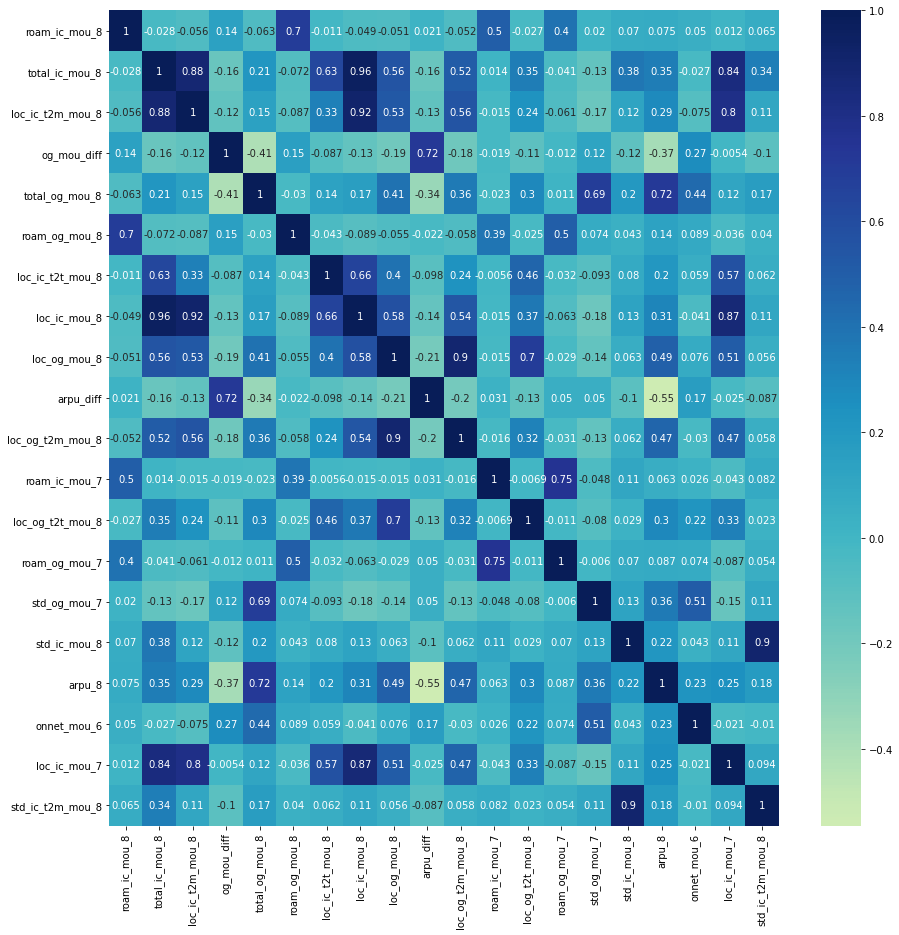

In [142]:
plt.rcParams["figure.figsize"] =(15,15)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, annot=True, cmap="YlGnBu")

### [THIRD MODEL] Applying Decision Tree

In [143]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default_1 = DecisionTreeClassifier(max_depth=5)
dt_default_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [144]:
# Making predictions
y_pred_default_1 = dt_default_1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default_1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6798
           1       0.36      0.38      0.37       203

    accuracy                           0.96      7001
   macro avg       0.67      0.68      0.67      7001
weighted avg       0.96      0.96      0.96      7001



In [145]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default_1))
print(accuracy_score(y_test,y_pred_default_1))

[[6661  137]
 [ 126   77]]
0.9624339380088559


### Hyperparameter Tuning

We can now use GridSearchCV to find multiple optimal hyperparameters together. Note that this time, we'll also specify the criterion (gini/entropy or IG).

In [146]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   35.4s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [147]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9729382938479414
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [148]:
# Running model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

#### Model Evaluation

In [149]:
# accuracy score
clf_gini.score(X_test,y_test)

0.9700042851021282

In [150]:
y_pred = clf_gini.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6798
           1       0.48      0.36      0.41       203

    accuracy                           0.97      7001
   macro avg       0.73      0.67      0.70      7001
weighted avg       0.97      0.97      0.97      7001



In [151]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6718   80]
 [ 130   73]]


# Business Recommendation 

- Telecom company needs to look at the roaming rates. <br/>
  **They have to give intuitive offers to the customers who are using roaming services.**
- Telecom company needs to re-visit STD and ISD rates. <br/>
   **The rates are too high. They should be bundled up in some packages.**

## The best mode is Random Forest having accurcy score of 97.1%##